## wine Dataset Classification using k-Means with Dimension Reduction

k-Means을 이용하여 PCA가 적용된 wine 데이터셋 분류

<span style="color: #2D3748; background-color:#fff5b1;">PCA를 적용하여 feature의 수를 2개와 3개로 구성한 후 k-Means을 이용하여 실험한 결과 정확도 측면에서는 PCA를 적용하지 않은 방법과 비슷하지만 분류 시간의 경우 PCA를 적용하지 않은 경우 시간이 증가하였다.</span>

In [82]:
import time
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine

In [83]:
comparison_acc = []
comparison_time = []

## k-Means with PCA feature 3

In [84]:
wine = load_wine()

pca = PCA(n_components=3)
features = pca.fit(wine.data).transform(wine.data)
target = wine.target

print(features.shape)

(178, 3)


In [85]:
avg_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):
    k = 3

    k_means = KMeans(n_clusters=k, random_state=seed)

    start = time.perf_counter()
    k_means.fit(features, target)
    end = time.perf_counter() - start

    score = metrics.accuracy_score(target, k_means.labels_)
    print("seed : ", seed, " / accuracy : ", score)

    avg_acc.append(score)
    avg_time.append(end)

print("-----" * 10)
print("Clustering Average Accuracy : %f" % np.array(avg_acc).mean())
print("Clustering Average Time : %.4f" % np.array(avg_time).mean(), "sec")

comparison_acc.append(np.array(avg_acc).mean())
comparison_time.append(np.array(avg_time).mean())

seed :  0  / accuracy :  0.1853932584269663
seed :  1  / accuracy :  0.702247191011236
seed :  2  / accuracy :  0.1853932584269663
seed :  3  / accuracy :  0.1853932584269663
seed :  4  / accuracy :  0.16853932584269662
seed :  5  / accuracy :  0.16853932584269662
seed :  6  / accuracy :  0.16853932584269662
seed :  7  / accuracy :  0.1853932584269663
seed :  8  / accuracy :  0.1853932584269663
seed :  9  / accuracy :  0.16853932584269662
--------------------------------------------------
Clustering Average Accuracy : 0.230337
Clustering Average Time : 0.0244 sec


## k-Means with PCA feature 2

In [86]:
pca = PCA(n_components=2)
features = pca.fit(wine.data).transform(wine.data)
target = wine.target

print(features.shape)

(178, 2)


In [87]:
avg_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):
    k = 3

    k_means = KMeans(n_clusters=k, random_state=seed)

    start = time.perf_counter()
    k_means.fit(features, target)
    end = time.perf_counter() - start

    score = metrics.accuracy_score(target, k_means.labels_)
    print("seed : ", seed, " / accuracy : ", score)

    avg_acc.append(score)
    avg_time.append(end)

print("-----" * 10)
print("Clustering Average Accuracy : %f" % np.array(avg_acc).mean())
print("Clustering Average Time : %.4f" % np.array(avg_time).mean(), "sec")

comparison_acc.append(np.array(avg_acc).mean())
comparison_time.append(np.array(avg_time).mean())

seed :  0  / accuracy :  0.1853932584269663
seed :  1  / accuracy :  0.702247191011236
seed :  2  / accuracy :  0.1853932584269663
seed :  3  / accuracy :  0.1853932584269663
seed :  4  / accuracy :  0.16853932584269662
seed :  5  / accuracy :  0.16853932584269662
seed :  6  / accuracy :  0.16853932584269662
seed :  7  / accuracy :  0.1853932584269663
seed :  8  / accuracy :  0.1853932584269663
seed :  9  / accuracy :  0.16853932584269662
--------------------------------------------------
Clustering Average Accuracy : 0.230337
Clustering Average Time : 0.0244 sec


## k-Means

In [88]:
wine = load_wine()

features = wine.data
target = wine.target

print(features.shape)

(178, 13)


In [89]:
avg_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):
    k = 3

    k_means = KMeans(n_clusters=k, random_state=seed)

    start = time.perf_counter()
    k_means.fit(features, target)
    end = time.perf_counter() - start

    score = metrics.accuracy_score(target, k_means.labels_)
    print("seed : ", seed, " / accuracy : ", score)

    avg_acc.append(score)
    avg_time.append(end)

print("-----" * 10)
print("Clustering Average Accuracy : %f" % np.array(avg_acc).mean())
print("Clustering Average Time : %.4f" % np.array(avg_time).mean(), "sec")

comparison_acc.append(np.array(avg_acc).mean())
comparison_time.append(np.array(avg_time).mean())

seed :  0  / accuracy :  0.1853932584269663
seed :  1  / accuracy :  0.702247191011236
seed :  2  / accuracy :  0.1853932584269663
seed :  3  / accuracy :  0.1853932584269663
seed :  4  / accuracy :  0.16853932584269662
seed :  5  / accuracy :  0.16853932584269662
seed :  6  / accuracy :  0.16853932584269662
seed :  7  / accuracy :  0.1853932584269663
seed :  8  / accuracy :  0.1853932584269663
seed :  9  / accuracy :  0.16853932584269662
--------------------------------------------------
Clustering Average Accuracy : 0.230337
Clustering Average Time : 0.0249 sec


### Method Comparison

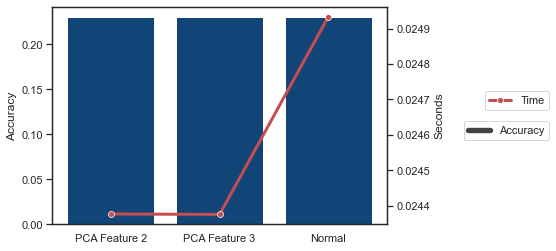

In [90]:
import seaborn as sns

sns.set(style="white", rc={"lines.linewidth": 3})

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

sns.barplot(x=["PCA Feature 2", "PCA Feature 3", "Normal"],
            y=[comparison_acc[1], comparison_acc[0], comparison_acc[2]], 
            color='#004488',
            ax=ax1)

sns.lineplot(x=["PCA Feature 2", "PCA Feature 3", "Normal"], 
             y=[comparison_time[1], comparison_time[0], comparison_time[2]],
             color='r',
             marker="o",
             ax=ax2)

ax1.set_ylabel("Accuracy")
ax2.set_ylabel("Seconds")

ax1.legend(["Accuracy"], loc=1, bbox_to_anchor=(1.5, 0.5))
ax2.legend(["Time"], loc=4, bbox_to_anchor=(1.5, 0.5))

plt.show()
sns.set()